In [1]:
from statsmodels.stats import power
print(r'alpha=0.05, power=0.8, effect size=0.5: sample size:',power.tt_ind_solve_power(effect_size = 0.5, alpha =0.05, power=0.8))
# Result: 63.77

alpha=0.05, power=0.8, effect size=0.5: sample size: 63.765611775409525



Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


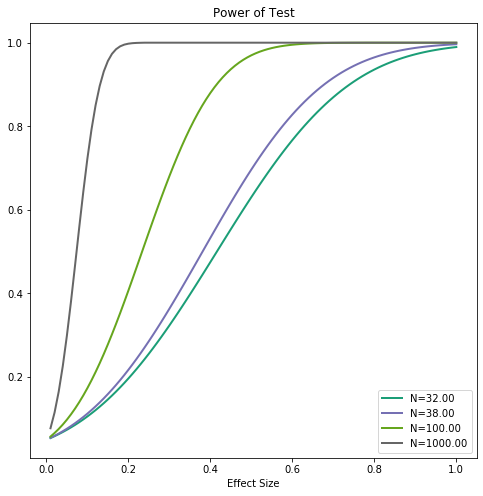

In [2]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array(array(range(1,101))/100)
sample_sizes = array([32,38,100,1000])
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
fig1=analysis.plot_power(dep_var='effect_size', 
                         nobs=sample_sizes, 
                         effect_size=effect_sizes,
                         alpha=0.05,
                         alternative='larger')
fig1.set_size_inches(8,8)
pyplot.show()

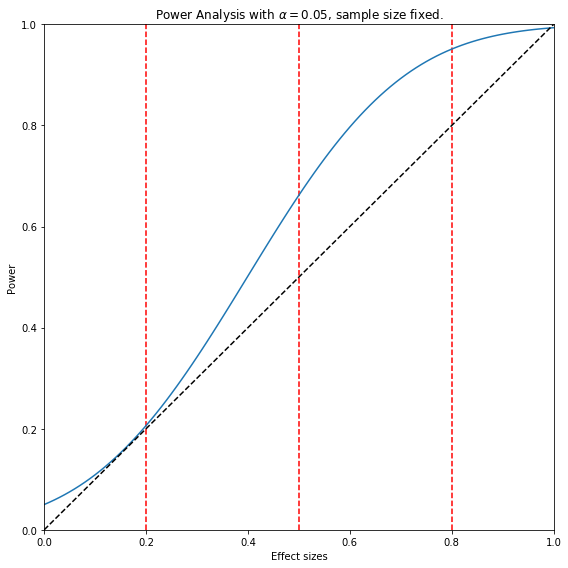

In [3]:
from numpy import array
import matplotlib.pyplot as plt
from statsmodels.stats.power import tt_ind_solve_power
# parameters for power analysis
effect_sizes = array(array(range(0,101))/100)
powers = [ tt_ind_solve_power(effect_size=x, nobs1=32, alpha=0.05, 
                              ratio=38/32, alternative='larger') for x in effect_sizes]
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(effect_sizes,powers)
plt.vlines(0.2, ymin=0, ymax=1, colors='r', linestyles='--', label='ES=0.2')
plt.vlines(0.5, ymin=0, ymax=1, colors='r', linestyles='--', label='ES=0.5')
plt.vlines(0.8, ymin=0, ymax=1, colors='r', linestyles='--', label='ES=0.8')
ax.plot(array(range(0,101))/100, array(range(0,101))/100,'k--')
ax.set_xlim([0,1]); ax.set_ylim([0,1]);
ax.set_xlabel('Effect sizes')
ax.set_ylabel('Power')
ax.set_title(r'Power Analysis with $\alpha=0.05$, sample size fixed.')
plt.tight_layout()